In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

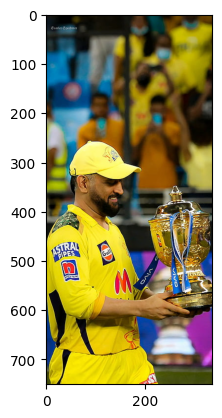

In [ ]:
# Load an image
image = cv2.imread('/content/1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

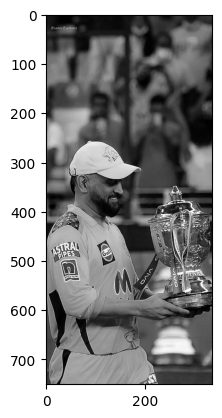

In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap='gray')

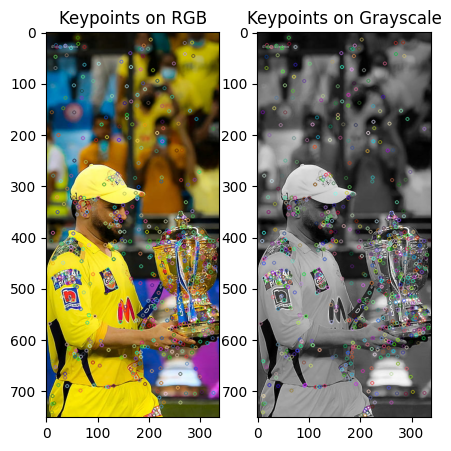

In [ ]:
# Initialize the SIFT feature extractor
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors for both images
kp1, des1 = sift.detectAndCompute(image_rgb, None)
kp2, des2 = sift.detectAndCompute(image_gray, None)

# Draw keypoints on the images
img1 = cv2.drawKeypoints(image_rgb, kp1, None)
img2 = cv2.drawKeypoints(image_gray, kp2, None)

# Display the images with keypoints
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Keypoints on RGB')
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Keypoints on Grayscale')
plt.show()

In [ ]:
# Visualize some descriptors
print('Descriptors for rgb image:\n',des1)
print('Descriptors for gray image:\n',des2)

Descriptors for rgb image:
 [[  4.   1.   0. ...   0.   2.   9.]
 [  1.  24.  74. ...   1.   0.   0.]
 [  5. 124.  69. ...   0.   0.   1.]
 ...
 [ 16.   9.   2. ...   0.   0.   0.]
 [  5.  13.  28. ...   1.   0.   0.]
 [  0.   0.   0. ...  10.  41.  31.]]
Descriptors for gray image:
 [[  4.   1.   0. ...   0.   2.   9.]
 [  1.  24.  74. ...   1.   0.   0.]
 [  5. 124.  69. ...   0.   0.   1.]
 ...
 [ 16.   9.   2. ...   0.   0.   0.]
 [  5.  13.  28. ...   1.   0.   0.]
 [  0.   0.   0. ...  10.  41.  31.]]


In [ ]:
# Extract descriptors from the SIFT keypoints
descriptors = np.concatenate((des1, des2), axis=0)
num_clusters = 100

# Perform K-means clustering on the descriptors
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(descriptors)

# Quantize the descriptors by assigning them to the nearest cluster centers
quantized_descriptors = kmeans.transform(descriptors)

# Print the quantized descriptors
print(quantized_descriptors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[491.54892 490.45087 525.5279  ... 509.16653 528.49506 463.28326]
 [536.08374 487.98596 487.47385 ... 478.84662 476.52682 487.38657]
 [497.37802 514.0281  502.97235 ... 472.53665 494.746   482.334  ]
 ...
 [521.4826  441.1765  427.2933  ... 380.72006 442.23523 476.35864]
 [445.0678  441.21063 469.80396 ... 388.89157 456.8619  421.63672]
 [515.5138  429.44952 451.77267 ... 377.2448  471.1155  434.02005]]


In [ ]:
# Create a histogram of the quantized descriptors for each image
histograms = []
for i in range(2):
  hist, _ = np.histogram(quantized_descriptors[i*len(des1):(i+1)*len(des1)], bins=num_clusters)
  histograms.append(hist)

# Normalize the histograms
histograms = np.array(histograms)
histograms = histograms / np.sum(histograms, axis=1)[:, np.newaxis]

# Print the fixed length feature vectors
print(histograms)

[[2.45398773e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.22699387e-05 0.00000000e+00 1.22699387e-05 2.45398773e-05
  1.22699387e-05 0.00000000e+00 6.13496933e-05 6.13496933e-05
  2.45398773e-05 8.58895706e-05 8.58895706e-05 1.59509202e-04
  1.59509202e-04 1.84049080e-04 2.82208589e-04 2.57668712e-04
  1.96319018e-04 2.08588957e-04 1.47239264e-04 1.96319018e-04
  2.69938650e-04 2.82208589e-04 4.53987730e-04 3.80368098e-04
  4.90797546e-04 6.13496933e-04 6.38036810e-04 6.74846626e-04
  7.36196319e-04 7.11656442e-04 9.81595092e-04 1.04294479e-03
  1.09202454e-03 1.32515337e-03 1.42331288e-03 1.64417178e-03
  1.91411043e-03 2.50306748e-03 2.80981595e-03 3.43558282e-03
  4.60122699e-03 4.78527607e-03 6.04907975e-03 6.79754601e-03
  8.26993865e-03 9.86503067e-03 1.13374233e-02 1.22208589e-02
  1.50552147e-02 1.61840491e-02 1.77055215e-02 2.07361963e-02
  2.18404908e-02 2.41717791e-02 2.60000000e-02 2.81595092e-02
  2.95705521e-02 3.20981595e-02 3.51901840e-02 3.58895706e-02
  3.7521

In [ ]:
# Train the models
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [ ]:
svm.fit(histograms, [0, 1])
dt.fit(histograms, [0, 1])
rf.fit(histograms, [0, 1])

# Evaluate the models
svm_pred = svm.predict(histograms)
dt_pred = dt.predict(histograms)
rf_pred = rf.predict(histograms)

svm_acc = accuracy_score(svm_pred, [0, 1])
svm_prec = precision_score(svm_pred, [0, 1])
svm_recall = recall_score(svm_pred, [0, 1])
svm_f1 = f1_score(svm_pred, [0, 1])

dt_acc = accuracy_score(dt_pred, [0, 1])
dt_prec = precision_score(dt_pred, [0, 1])
dt_recall = recall_score(dt_pred, [0, 1])
dt_f1 = f1_score(dt_pred, [0, 1])

rf_acc = accuracy_score(rf_pred, [0, 1])
rf_prec = precision_score(rf_pred, [0, 1])
rf_recall = recall_score(rf_pred, [0, 1])
rf_f1 = f1_score(rf_pred, [0, 1])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print the results
print('SVM: Accuracy:', svm_acc, 'Precision:', svm_prec, 'Recall:', svm_recall, 'F1:', svm_f1)
print('Decision Tree: Accuracy:', dt_acc, 'Precision:', dt_prec, 'Recall:', dt_recall, 'F1:', dt_f1)
print('Random Forest: Accuracy:', rf_acc, 'Precision:', rf_prec, 'Recall:', rf_recall, 'F1:', rf_f1)

SVM: Accuracy: 0.5 Precision: 1.0 Recall: 0.5 F1: 0.6666666666666666
Decision Tree: Accuracy: 0.5 Precision: 0.0 Recall: 0.0 F1: 0.0
Random Forest: Accuracy: 0.5 Precision: 1.0 Recall: 0.5 F1: 0.6666666666666666
